In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from datetime import datetime
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.preprocessing import minmax_scale
import seaborn as sb
import datetime as dt
import matplotlib.pyplot as mp
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import math as math
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

lbl = LabelEncoder()

#Loading data
table = pd.read_csv('movies-classification-dataset.csv',on_bad_lines='skip', engine='python')
bonus_table = pd.read_csv('movies-credit-students-train.csv', on_bad_lines='skip', engine='python')

def Feature_Encoder(X,cols):
    for c in cols:
        lbl.fit(list(X[c].values))
        X[c] = lbl.transform(list(X[c].values))
    return X

bonus_table.rename(columns = {'movie_id' : 'id'}, inplace = True)
table = bonus_table.merge(table)


table['release_date'] = pd.to_datetime(table['release_date'],dayfirst=True)
table['year'] = table['release_date'].dt.year
table['month'] = table['release_date'].dt.month
table.drop('release_date',  axis=1, inplace=True)
table.drop('status',  axis=1, inplace=True)

# print(table['status'].unique())

table["Rate"].replace({"High": 3, "Intermediate": 2, "Low": 1}, inplace = True)

Y = table['Rate']
X = table.drop('Rate', inplace=False, axis=1)


xTrain,xTest,yTrain,yTest = train_test_split(X, Y, test_size = 0.20, random_state=10)
trainTable = pd.DataFrame(xTrain, columns=['id','title', 'cast','crew', 'budget','genres','homepage',	'keywords','original_language',	'original_title'	,'overview', 'viewercount'	,	'production_companies'	,'production_countries' , 'revenue', 'runtime',	'spoken_languages',	'tagline'	 , 'vote_count', 'year', 'month'])
trainTable['Rate'] = yTrain



json_columns = ['genres', 'keywords','spoken_languages', 'production_companies', 'production_countries', 'cast' , 'crew']
col = ('homepage',	'original_title'	,'overview', 'original_language'	,'tagline', 'title')

# label encoding & filling nulls with mean values
trainTable = Feature_Encoder(trainTable,col)
trainTable.fillna((trainTable.mean()), inplace = True)
trainTable.head()


<ipython-input-140-6f266654cb33>:37: UserWarning: Parsing dates in MM/DD/YYYY format when dayfirst=True was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  table['release_date'] = pd.to_datetime(table['release_date'],dayfirst=True)
<ipython-input-140-6f266654cb33>:62: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  trainTable.fillna((trainTable.mean()), inplace = True)


,id,title,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_companies,production_countries,revenue,runtime,spoken_languages,tagline,vote_count,year,month,Rate
374,10197,1223,"[{""cast_id"": 15, ""character"": ""Lilli"", ""credit...","[{""credit_id"": ""52fe43409251416c7500933d"", ""de...",80000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10402, ""n...",129,"[{""id"": 10937, ""name"": ""memory""}, {""id"": 16573...",4,1218,...,"[{""name"": ""The Weinstein Company"", ""id"": 308},...","[{""iso_3166_1"": ""IT"", ""name"": ""Italy""}, {""iso_...",53825515,112.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",1747,165,2009,3,2
2908,39269,1277,"[{""cast_id"": 2, ""character"": ""Don"", ""credit_id...","[{""credit_id"": ""52fe47099251416c9106826f"", ""de...",0,"[{""id"": 18, ""name"": ""Drama""}]",899,"[{""id"": 4470, ""name"": ""punk""}, {""id"": 10183, ""...",4,1268,...,"[{""name"": ""Robson Street"", ""id"": 71953}]","[{""iso_3166_1"": ""CA"", ""name"": ""Canada""}]",0,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",71,17,1980,1,2
1158,85446,1641,"[{""cast_id"": 1010, ""character"": ""Emily"", ""cred...","[{""credit_id"": ""52fe49419251416c910a76d7"", ""de...",33000000,"[{""id"": 10402, ""name"": ""Music""}, {""id"": 18, ""n...",899,"[{""id"": 186730, ""name"": ""flash mob""}, {""id"": 1...",4,1628,...,"[{""name"": ""Summit Entertainment"", ""id"": 491}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",140470746,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",1094,663,2012,7,3
18,271110,329,"[{""cast_id"": 9, ""character"": ""Steve Rogers / C...","[{""credit_id"": ""569443d59251414b67000428"", ""de...",250000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",103,"[{""id"": 393, ""name"": ""civil war""}, {""id"": 6091...",4,323,...,"[{""name"": ""Studio Babelsberg"", ""id"": 264}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1153304495,147.0,"[{""iso_639_1"": ""ro"", ""name"": ""Rom\u00e2n\u0103...",341,7241,2016,4,3
2402,11545,1455,"[{""cast_id"": 11, ""character"": ""Max Fischer"", ""...","[{""credit_id"": ""52fe44569251416c7503134d"", ""de...",9000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",899,"[{""id"": 3551, ""name"": ""private school""}, {""id""...",4,1445,...,"[{""name"": ""Touchstone Pictures"", ""id"": 9195}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",17096053,93.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",961,676,1998,9,3


In [ ]:
testTable = pd.read_csv('test-movies-classification-dataset.csv', on_bad_lines='skip', engine='python')
bonus_test_table = pd.read_csv('test-movies-credit-students-classification.csv', on_bad_lines='skip', engine='python')

def Feature_Encoder(X,cols):
    for c in cols:
        lbl.fit(list(X[c].values))
        X[c] = lbl.transform(list(X[c].values))
    return X

bonus_test_table.rename(columns = {'movie_id' : 'id'}, inplace = True)
testTable = bonus_test_table.merge(testTable)
testTable['release_date'] = pd.to_datetime(testTable['release_date'],dayfirst=True)
testTable['year'] = testTable['release_date'].dt.year
testTable['month'] = testTable['release_date'].dt.month
testTable.drop('release_date', inplace=True, axis=1)
testTable.drop('status',  axis=1, inplace=True)
testTable["Rate"].replace({"High": 3, "Intermediate": 2, "Low": 1}, inplace = True)


<ipython-input-141-ac1b5b44d190>:12: UserWarning: Parsing dates in MM/DD/YYYY format when dayfirst=True was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  testTable['release_date'] = pd.to_datetime(testTable['release_date'],dayfirst=True)


In [ ]:
# test
# testTable = pd.DataFrame(xTest, columns=['id','title', 'cast','crew', 'budget','genres','homepage',	'keywords','original_language',	'original_title'	,'overview', 'viewercount'	,	'production_companies'	,'production_countries' , 'revenue', 'runtime',	'spoken_languages',	'status'	,'tagline'	 , 'vote_count', 'year', 'month'])
# testTable['Rate'] = yTest


json_columns = ['genres', 'keywords','spoken_languages', 'production_companies', 'production_countries', 'cast' , 'crew']
col = ('homepage',	'original_title'	,'overview', 'original_language'	,'tagline', 'title')

testTable = Feature_Encoder(testTable,col)
testTable.fillna((testTable.mean()), inplace = True)
allmovies_df_test = testTable.copy()

testTable.head()

<ipython-input-142-e1d14eb2a98c>:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  testTable.fillna((testTable.mean()), inplace = True)


,id,title,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_companies,production_countries,revenue,runtime,spoken_languages,tagline,vote_count,Rate,year,month
0,19995,231,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",295,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",4,226,...,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",473,11800,3,2009,10
1,206647,1994,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",837,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",4,1980,...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",51,4466,2,2015,10
2,49026,2269,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",904,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",4,2246,...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",1768,9106,3,2012,7
3,49529,1186,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",147,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",4,1168,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",1196,2124,2,2012,7
4,559,2002,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de...",258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",840,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",4,1988,...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",1823,3576,2,2007,1


In [ ]:
import json

json_columns = ['genres', 'production_companies','keywords','spoken_languages', 'production_countries']
allmovies_df = trainTable.copy()
for column in json_columns:
  allmovies_df[column] = allmovies_df[column].apply(json.loads)
allmovies_df['crew'] = allmovies_df['crew'].apply(json.loads)
allmovies_df['cast'] = allmovies_df['cast'].apply(json.loads)
# allmovies_df['production_companies'] = allmovies_df['production_companies'].apply(json.loads)

def process_jsoncols(colname):
  jsoncollist=[]
  for x in colname:
    jsoncollist.append(x['name'])
  return jsoncollist


for colname in json_columns:
    allmovies_df[colname] = allmovies_df[colname].apply(process_jsoncols)

allmovies_df.head()


,id,title,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_companies,production_countries,revenue,runtime,spoken_languages,tagline,vote_count,year,month,Rate
374,10197,1223,"[{'cast_id': 15, 'character': 'Lilli', 'credit...","[{'credit_id': '52fe43409251416c7500933d', 'de...",80000000,"[Drama, Music, Romance]",129,"[memory, sidewalk cafe, room key, driving a ca...",4,1218,...,"[The Weinstein Company, Relativity Media]","[Italy, United States of America]",53825515,112.0,"[English, Français, Italiano]",1747,165,2009,3,2
2908,39269,1277,"[{'cast_id': 2, 'character': 'Don', 'credit_id...","[{'credit_id': '52fe47099251416c9106826f', 'de...",0,[Drama],899,"[punk, independent film, coming of age, teenag...",4,1268,...,[Robson Street],[Canada],0,94.0,[English],71,17,1980,1,2
1158,85446,1641,"[{'cast_id': 1010, 'character': 'Emily', 'cred...","[{'credit_id': '52fe49419251416c910a76d7', 'de...",33000000,"[Music, Drama, Romance]",899,"[flash mob, dance instructor, real estate deve...",4,1628,...,[Summit Entertainment],[United States of America],140470746,99.0,[English],1094,663,2012,7,3
18,271110,329,"[{'cast_id': 9, 'character': 'Steve Rogers / C...","[{'credit_id': '569443d59251414b67000428', 'de...",250000000,"[Adventure, Action, Science Fiction]",103,"[civil war, war, marvel comic, sequel, superhe...",4,323,...,"[Studio Babelsberg, Marvel Studios, Walt Disne...",[United States of America],1153304495,147.0,"[Română, English, Deutsch, Pусский]",341,7241,2016,4,3
2402,11545,1455,"[{'cast_id': 11, 'character': 'Max Fischer', '...","[{'credit_id': '52fe44569251416c7503134d', 'de...",9000000,"[Comedy, Drama]",899,"[private school, lone wolf, theatre play, thea...",4,1445,...,[Touchstone Pictures],[United States of America],17096053,93.0,"[Français, English, Latin, Español]",961,676,1998,9,3


In [ ]:
# allmovies_df['production_companies'] = allmovies_df['production_companies'].apply(process_jsoncols)
allmovies_df['production_companies'].head(2)


374     [The Weinstein Company, Relativity Media]
2908                              [Robson Street]
Name: production_companies, dtype: object

In [ ]:

for index,x in zip(allmovies_df.index,allmovies_df['cast']):
    castlist=[]
    for i in range(len(x)):
        if (x[i]['order'] < 1):
            castlist.append((x[i]['name']))
    allmovies_df.loc[index,'cast']=str(castlist)
allmovies_df['cast'].head(2)


374     ['Judi Dench']
2908                []
Name: cast, dtype: object

In [ ]:
allmovies_df['cast'] = allmovies_df['cast'].str.strip('[]').str.replace("'",'').str.replace('"','').str.replace(' ','')
allmovies_df['cast'].head(2)


374     JudiDench
2908             
Name: cast, dtype: object

In [ ]:
for index,x in zip(allmovies_df.index,allmovies_df['crew']):
    crewlist=[]
    for i in range(len(x)):
        if (x[i]['job'] == 'Director'):
            crewlist.append((x[i]['name']))
    allmovies_df.loc[index,'crew']=str(crewlist)
allmovies_df['crew'] = allmovies_df['crew'].str.strip('[]').str.replace("'",'').str.replace('"','').str.replace(' ','')
allmovies_df['crew'].head(2)


374      RobMarshall
2908    DennisHopper
Name: crew, dtype: object

In [ ]:
listcols = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']
for colname in listcols:
    allmovies_df[colname] = allmovies_df[colname].apply(lambda x: ','.join(map(str, x)))
allmovies_df.head(2)


,id,title,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_companies,production_countries,revenue,runtime,spoken_languages,tagline,vote_count,year,month,Rate
374,10197,1223,JudiDench,RobMarshall,80000000,"Drama,Music,Romance",129,"memory,sidewalk cafe,room key,driving a car,co...",4,1218,...,"The Weinstein Company,Relativity Media","Italy,United States of America",53825515,112.0,"English,Français,Italiano",1747,165,2009,3,2
2908,39269,1277,,DennisHopper,0,Drama,899,"punk,independent film,coming of age,teenage gi...",4,1268,...,Robson Street,Canada,0,94.0,English,71,17,1980,1,2


In [ ]:
from itertools import islice

json_columns = ['cast' , 'crew']
json_columns_split = ['genres', 'production_companies','keywords','spoken_languages', 'production_countries']

def count_elements(lst):
    elements = {}
    for elem in lst:
        if elem in elements.keys():
            elements[elem] +=1
        else:
            elements[elem] = 1
    return elements

# take top 20 repeated items of columns then add the values as columns to dataframe
def process_jsoncols_top(colname, top=20):
  jsoncollist=list(allmovies_df[colname])
  jsonCount = count_elements(jsoncollist)
  top20_col = sorted(jsonCount, key=jsonCount.get, reverse=True)[1:top]
  for colVal in top20_col:
      if colVal.strip():
        allmovies_df[colVal] = allmovies_df[colname].str.contains(colVal).apply(lambda x:1 if x else 0)
        allmovies_df_test[colVal] = 0;

# split column values and get a unique list of them then add the values as columns to dataframe
def process_jsoncols_split(colname):
  jsonlist = set()
  for sstr in allmovies_df[colname].str.split(','):
      jsonlist = set().union(sstr, jsonlist)
  jsonlist = list(jsonlist)
  # jsonlist.remove('')
  for i, colsingle in enumerate(islice(jsonlist, 20)):
    if colsingle.strip():
      allmovies_df[colsingle] = allmovies_df[colname].str.contains(colsingle).apply(lambda x:1 if x else 0)
      allmovies_df_test[colsingle] = 0;

for colname in json_columns:
  process_jsoncols_top(colname);
for colname in json_columns_split:
  process_jsoncols_split(colname);
# for colname in allmovies_df.columns:
#   print(colname)

allmovies_df.head()

<ipython-input-149-e3f476b7d5e6>:34: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  allmovies_df[colsingle] = allmovies_df[colname].str.contains(colsingle).apply(lambda x:1 if x else 0)
<ipython-input-149-e3f476b7d5e6>:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  allmovies_df[colsingle] = allmovies_df[colname].str.contains(colsingle).apply(lambda x:1 if x else 0)
<ipython-input-149-e3f476b7d5e6>:34: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

,id,title,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,Austria,South Africa,Japan,Romania,Bulgaria,China,Belgium,Sweden,India,Dominica
374,10197,1223,JudiDench,RobMarshall,80000000,"Drama,Music,Romance",129,"memory,sidewalk cafe,room key,driving a car,co...",4,1218,...,0,0,0,0,0,0,0,0,0,0
2908,39269,1277,,DennisHopper,0,Drama,899,"punk,independent film,coming of age,teenage gi...",4,1268,...,0,0,0,0,0,0,0,0,0,0
1158,85446,1641,KathrynMcCormick,ScottSpeer,33000000,"Music,Drama,Romance",899,"flash mob,dance instructor,real estate develop...",4,1628,...,0,0,0,0,0,0,0,0,0,0
18,271110,329,ChrisEvans,"AnthonyRusso,JoeRusso",250000000,"Adventure,Action,Science Fiction",103,"civil war,war,marvel comic,sequel,superhero,ba...",4,323,...,0,0,0,0,0,0,0,0,0,0
2402,11545,1455,JasonSchwartzman,WesAnderson,9000000,"Comedy,Drama",899,"private school,lone wolf,theatre play,theatre ...",4,1445,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import json
json_columns = ['genres', 'production_companies', 'keywords','spoken_languages', 'production_countries']
for column in json_columns:
  allmovies_df_test[column] = allmovies_df_test[column].apply(json.loads)
allmovies_df_test['crew'] = allmovies_df_test['crew'].apply(json.loads)
allmovies_df_test['cast'] = allmovies_df_test['cast'].apply(json.loads)

def process_jsoncols(colname):
  jsoncollist=[]
  for x in colname:
    jsoncollist.append(x['name'])
  return jsoncollist


for colname in json_columns:
    allmovies_df_test[colname] = allmovies_df_test[colname].apply(process_jsoncols)

allmovies_df_test.head()

,id,title,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,Austria,South Africa,Japan,Romania,Bulgaria,China,Belgium,Sweden,India,Dominica
0,19995,231,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...",237000000,"[Action, Adventure, Fantasy, Science Fiction]",295,"[culture clash, future, space war, space colon...",4,226,...,0,0,0,0,0,0,0,0,0,0
1,206647,1994,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...",245000000,"[Action, Adventure, Crime]",837,"[spy, based on novel, secret agent, sequel, mi...",4,1980,...,0,0,0,0,0,0,0,0,0,0
2,49026,2269,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",250000000,"[Action, Crime, Drama, Thriller]",904,"[dc comics, crime fighter, terrorist, secret i...",4,2246,...,0,0,0,0,0,0,0,0,0,0
3,49529,1186,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",260000000,"[Action, Adventure, Science Fiction]",147,"[based on novel, mars, medallion, space travel...",4,1168,...,0,0,0,0,0,0,0,0,0,0
4,559,2002,"[{'cast_id': 30, 'character': 'Peter Parker / ...","[{'credit_id': '52fe4252c3a36847f80151a5', 'de...",258000000,"[Fantasy, Action, Adventure]",840,"[dual identity, amnesia, sandstorm, love of on...",4,1988,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
allmovies_df_test['production_companies'].head(2)

0    [Ingenious Film Partners, Twentieth Century Fo...
1                     [Columbia Pictures, Danjaq, B24]
Name: production_companies, dtype: object

In [ ]:
for index,x in zip(allmovies_df_test.index,allmovies_df_test['cast']):
    castlist=[]
    for i in range(len(x)):
        if (x[i]['order'] < 1):
            castlist.append((x[i]['name']))
    allmovies_df_test.loc[index,'cast']=str(castlist)
allmovies_df_test['cast'].head(2)

0    ['Sam Worthington']
1       ['Daniel Craig']
Name: cast, dtype: object

In [ ]:
#test
allmovies_df_test['cast'] = allmovies_df_test['cast'].str.strip('[]').str.replace("'",'').str.replace('"','').str.replace(' ','')
allmovies_df_test['cast'].head(2)

0    SamWorthington
1       DanielCraig
Name: cast, dtype: object

In [ ]:
#test
for index,x in zip(allmovies_df_test.index,allmovies_df_test['crew']):
    crewlist=[]
    for i in range(len(x)):
        if (x[i]['job'] == 'Director'):
            crewlist.append((x[i]['name']))
    allmovies_df_test.loc[index,'crew']=str(crewlist)
allmovies_df_test['crew'] = allmovies_df_test['crew'].str.strip('[]').str.replace("'",'').str.replace('"','').str.replace(' ','')
allmovies_df_test['crew'].head(2)


0    JamesCameron
1       SamMendes
Name: crew, dtype: object

In [ ]:
listcols = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']
for colname in listcols:
    allmovies_df_test[colname] = allmovies_df_test[colname].apply(lambda x: ','.join(map(str, x)))
allmovies_df_test.head(2)

,id,title,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,Austria,South Africa,Japan,Romania,Bulgaria,China,Belgium,Sweden,India,Dominica
0,19995,231,SamWorthington,JamesCameron,237000000,"Action,Adventure,Fantasy,Science Fiction",295,"culture clash,future,space war,space colony,so...",4,226,...,0,0,0,0,0,0,0,0,0,0
1,206647,1994,DanielCraig,SamMendes,245000000,"Action,Adventure,Crime",837,"spy,based on novel,secret agent,sequel,mi6,bri...",4,1980,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#test
json_columns = ['cast' , 'crew']
json_columns_split = ['genres', 'production_companies','keywords', 'spoken_languages', 'production_countries']

def count_elements(lst):
    elements = {}
    for elem in lst:
        if elem in elements.keys():
            elements[elem] +=1
        else:
            elements[elem] = 1
    return elements

# take top 20 repeated items of columns then add the values as columns to dataframe
def process_jsoncols_top(colname, top=20):
  jsoncollist=list(allmovies_df_test[colname])
  jsonCount = count_elements(jsoncollist)
  all_cols = sorted(jsonCount, key=jsonCount.get, reverse=True) # [1:top]
  for colVal in all_cols:
      if colVal.strip() and colVal in allmovies_df_test.columns:
        allmovies_df_test[colVal] = allmovies_df_test[colname].str.contains(colVal).apply(lambda x:1 if x else 0)

# split column values and get a unique list of them then add the values as columns to dataframe
def process_jsoncols_split(colname):
  jsonlist = set()
  for sstr in allmovies_df_test[colname].str.split(','):
      jsonlist = set().union(sstr, jsonlist)
  jsonlist = list(jsonlist)
  # jsonlist.remove('')
  for colsingle in jsonlist:
    if colsingle.strip() and colsingle in allmovies_df_test.columns:
      allmovies_df_test[colsingle] = allmovies_df_test[colname].str.contains(colsingle).apply(lambda x:1 if x else 0)

for colname in json_columns:
  process_jsoncols_top(colname);
for colname in json_columns_split:
  process_jsoncols_split(colname);
# for colname in allmovies_df_test.columns:
#   print(colname)

  # print(allmovies_df)

<ipython-input-156-29890e2ba5de>:32: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  allmovies_df_test[colsingle] = allmovies_df_test[colname].str.contains(colsingle).apply(lambda x:1 if x else 0)


In [ ]:
columns_drop = ['genres', 'keywords','spoken_languages', 'production_companies' ,  'production_countries', 'cast' , 'crew']

for col in columns_drop:
  allmovies_df.drop(col , inplace=True, axis=1)
  allmovies_df_test.drop(col , inplace=True, axis=1)

# print(json_columns)
print(allmovies_df.head)




<bound method NDFrame.head of           id  title     budget  homepage  original_language  original_title  \
374    10197   1223   80000000       129                  4            1218   
2908   39269   1277          0       899                  4            1268   
1158   85446   1641   33000000       899                  4            1628   
18    271110    329  250000000       103                  4             323   
2402   11545   1455    9000000       899                  4            1445   
...      ...    ...        ...       ...                ...             ...   
2009   18736   1985   17000000        55                  4            1960   
1180   12106   2075   32000000       899                  4            2048   
1344  112949   1457   28000000       899                  4            1447   
527    10783   1076   65000000       899                  4            1070   
1289   10350   2378   30000000       899                  4            2338   

      overview  viewe

In [ ]:

# normalize
min_max_Scalar = preprocessing.MinMaxScaler()
coll = allmovies_df.columns
res = min_max_Scalar.fit_transform(allmovies_df)
min_max_Scalar_df = pd.DataFrame(res , columns=coll)
# allmovies_df = min_max_Scalar_df
yTrain2 = min_max_Scalar_df['Rate']
# xTrain2 = min_max_Scalar_df.iloc[:, :-1].values
xTrain2 = min_max_Scalar_df.drop('Rate', inplace=False, axis=1)

print(min_max_Scalar_df['Rate'])
print(xTrain2)

0       0.5
1       0.5
2       1.0
3       1.0
4       1.0
       ... 
2421    0.5
2422    0.5
2423    1.0
2424    0.0
2425    0.0
Name: Rate, Length: 2426, dtype: float64
            id     title    budget  homepage  original_language  \
0     0.022800  0.504538  0.285714  0.143493           0.210526   
1     0.087835  0.526815  0.000000  1.000000           0.210526   
2     0.191134  0.676980  0.117857  1.000000           0.210526   
3     0.606469  0.135726  0.892857  0.114572           0.210526   
4     0.025815  0.600248  0.032143  1.000000           0.210526   
...        ...       ...       ...       ...                ...   
2421  0.041902  0.818894  0.060714  0.061179           0.210526   
2422  0.027070  0.856023  0.114286  1.000000           0.210526   
2423  0.252659  0.601073  0.100000  1.000000           0.210526   
2424  0.024111  0.443894  0.232143  1.000000           0.210526   
2425  0.023142  0.981023  0.107143  1.000000           0.210526   

      original_title  

In [ ]:

# normalize
# min_max_Scalar = preprocessing.StandardScaler()
min_max_Scalar = preprocessing.MinMaxScaler()
coll = allmovies_df_test.columns
res = min_max_Scalar.fit_transform(allmovies_df_test)
min_max_Scalar_df = pd.DataFrame(res, columns=coll)
# allmovies_df_test = min_max_Scalar_df
yTest2 = min_max_Scalar_df['Rate']
xTest2 = min_max_Scalar_df.drop('Rate', inplace=False, axis=1)

print(min_max_Scalar_df['Rate'])
print(xTest2)

0       1.0
1       0.5
2       1.0
3       0.5
4       0.5
       ... 
3028    1.0
3029    0.5
3030    1.0
3031    0.5
3032    0.5
Name: Rate, Length: 3033, dtype: float64
            id     title    budget  homepage  original_language  \
0     0.044718  0.076238  0.846429       0.0               0.20   
1     0.462264  0.658086  0.875000       0.0               0.20   
2     0.109661  0.748845  0.892857       0.0               0.20   
3     0.110786  0.391419  0.928571       0.0               0.20   
4     0.001239  0.660726  0.921429       0.0               0.20   
...        ...       ...       ...       ...                ...   
3028  0.122086  0.477228  0.014286       0.0               0.25   
3029  0.116348  0.665347  0.002321       0.0               0.20   
3030  0.078153  0.812211  0.000000       0.0               0.20   
3031  0.509975  0.289769  0.000000       0.0               0.70   
3032  0.135154  0.063696  0.014286       0.0               0.20   

      original_title  

In [ ]:
# for colname in allmovies_df.columns:
#   train_dummies = pd.get_dummies(colname, prefix=colname)
# trainTable = trainTable.join(train_dummies)
# for colname in allmovies_df_test.columns:
#   test_dummies = pd.get_dummies(colname, prefix=colname)
# testTable = testTable.join(test_dummies)

# feature_difference = set(allmovies_df) - set(allmovies_df_test)
# feature_difference_df = pd.DataFrame(data=np.zeros((allmovies_df_test.shape[0], len(feature_difference))),
#                                   columns=list(feature_difference))
# print(len(feature_difference_df.columns))
# allmovies_df_test = allmovies_df_test.join(feature_difference_df)

In [ ]:
print(len(allmovies_df_test.columns))
print(len(allmovies_df.columns))

149
149


In [ ]:
# import copy
# train_objs_num = len(allmovies_df)
# dataset = pd.concat(objs=[allmovies_df, allmovies_df_test], axis=0)
# dataset = pd.get_dummies(dataset)
# allmovies_df = copy.copy(dataset[:train_objs_num])
# allmovies_df_test = copy.copy(dataset[train_objs_num:])


In [ ]:
allmovies_df.fillna((0), inplace = True)
allmovies_df_test.fillna((0), inplace = True)

In [ ]:

allmovies_df_test.head()

,id,title,budget,homepage,original_language,original_title,overview,viewercount,revenue,runtime,...,Austria,South Africa,Japan,Romania,Bulgaria,China,Belgium,Sweden,India,Dominica
0,19995,231,237000000,0,4,226,1580,150.437577,2787965087,162.0,...,0,0,0,0,0,0,0,0,0,0
1,206647,1994,245000000,0,4,1980,118,107.376788,880674609,148.0,...,0,0,0,0,0,0,0,0,0,0
2,49026,2269,250000000,0,4,2246,1297,112.312950,1084939099,165.0,...,0,0,0,0,0,0,0,0,0,0
3,49529,1186,260000000,0,4,1168,1757,43.926995,284139100,132.0,...,0,0,0,0,0,0,0,0,0,0
4,559,2002,258000000,0,4,1988,2488,115.699814,890871626,139.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
yTest2 = allmovies_df_test['Rate']
xTest2 = allmovies_df_test.drop('Rate', inplace=False, axis=1)

In [ ]:
yTrain2 = allmovies_df['Rate']
xTrain2 = allmovies_df.drop('Rate', inplace=False, axis=1)

In [ ]:
print(len(xTest2.columns))
print(len(xTrain2.columns))

# print(xT)

148
148


In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

corr = allmovies_df.corr()
# plt.figure(figsize=(11,8))
# sns.heatmap(corr, cmap="Greens",annot=True)
# plt.show()
corr_abs = corr.abs()
# corr_sorted = corr_abs.values()
corr_abs['Rate'].sort_values(ascending=False).head(20)
# for (col, val) in corr_abs['Rate'].sort_values(ascending=False):
#   print(col, val)
corr_abs

,id,title,budget,homepage,original_language,original_title,overview,viewercount,revenue,runtime,...,Austria,South Africa,Japan,Romania,Bulgaria,China,Belgium,Sweden,India,Dominica
id,1.000000,0.008131,0.034152,0.107047,0.071337,0.011137,0.048306,0.128242,0.005236,0.046679,...,0.002597,0.024684,0.035838,0.019251,0.026409,0.074862,0.065902,0.002668,0.050222,0.012158
title,0.008131,1.000000,0.010248,0.128882,0.025495,0.941155,0.003415,0.010924,0.008681,0.006234,...,0.024791,0.024159,0.013137,0.012513,0.014281,0.004884,0.005880,0.024455,0.008665,0.003037
budget,0.034152,0.010248,1.000000,0.195699,0.066597,0.000383,0.054634,0.462100,0.691305,0.195308,...,0.021603,0.021966,0.009342,0.001373,0.008610,0.006935,0.037092,0.029247,0.020895,0.080439
homepage,0.107047,0.128882,0.195699,1.000000,0.011747,0.133762,0.023219,0.230378,0.210150,0.019202,...,0.011380,0.022018,0.010989,0.025300,0.026434,0.027461,0.021969,0.023811,0.042340,0.052510
original_language,0.071337,0.025495,0.066597,0.011747,1.000000,0.127193,0.014148,0.059721,0.060452,0.074646,...,0.000708,0.009981,0.071640,0.007170,0.002875,0.373394,0.041534,0.072726,0.043371,0.002875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
China,0.074862,0.004884,0.006935,0.027461,0.373394,0.114396,0.019913,0.004632,0.009912,0.035514,...,0.004845,0.008406,0.016272,0.004845,0.002421,1.000000,0.032021,0.007670,0.011141,0.002421
Belgium,0.065902,0.005880,0.037092,0.021969,0.041534,0.028143,0.031184,0.029740,0.039028,0.021758,...,0.003414,0.064512,0.032795,0.118382,0.001706,0.032021,1.000000,0.005405,0.007850,0.001706
Sweden,0.002668,0.024455,0.029247,0.023811,0.072726,0.016380,0.009012,0.002753,0.020478,0.028507,...,0.002615,0.004536,0.007555,0.002615,0.001306,0.007670,0.005405,1.000000,0.006012,0.001306
India,0.050222,0.008665,0.020895,0.042340,0.043371,0.012228,0.027350,0.020628,0.014476,0.060815,...,0.003797,0.056837,0.027441,0.003797,0.001898,0.011141,0.007850,0.006012,1.000000,0.001898


In [ ]:
# linear regression
# featuresPOLY = PolynomialFeatures(degree = 1)

# xTrainPOLY = featuresPOLY.fit_transform( xTrain2 )

# polyModel = linear_model.LinearRegression()
# polyModel.fit(xTrainPOLY , yTrain2)

# yTrainPred = polyModel.predict(xTrainPOLY)
# ypred=polyModel.predict(featuresPOLY.transform(xTest2))

# pred_iction = polyModel.predict(featuresPOLY.fit_transform( xTest2))

# print('The Co-efficient of Linear Regression = ',  polyModel.coef_)
# print('The Mean Square Error (MSE) = ', metrics.mean_squared_error(yTest2 , pred_iction))

In [ ]:
# lasso regression
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import Lasso
# # Scale the data using StandardScaler
# scaler = StandardScaler()
# xTrain2 = scaler.fit_transform(xTrain2)
# xTest = scaler.transform(xTest2)
# # Fit Lasso regression model
# lasso = Lasso(alpha=0.4)
# lasso.fit(xTrain2, yTrain2)
# # Evaluate model performance on test set
# y_pred = lasso.predict(xTest2)
# # Model Score
# print("Model Score: ", lasso.score(xTest2, yTest2))
# print('The Mean Square Error (MSE) = ', metrics.mean_squared_error(yTest2 , y_pred))

In [ ]:
import pickle
def save_model(model, file_name):
  pickle.dump(model, open(file_name, 'wb'))

def load_model(file_name):
  return pickle.load(open(file_name+'.pkl', 'rb'))


In [ ]:
import time
models_names = ['KNN', 'NaiveBays', 'Logistic', 'RF', 'DT']
accuracy_list = []
train_time_list = []
test_time_list = []


In [ ]:
print('KNN')
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# classifier = KNeighborsClassifier(n_neighbors=30)
start_time = time.time()

# classifier.fit(xTrain2, yTrain2)
classifier = load_model('classifier')
duration = time.time()-start_time;
train_time_list.append(duration)
# print("time - {}".format(time.time()-start_time))

#save model
# save_model(classifier,'classifier.pkl')

# Predict y data with classifier:
start_time = time.time()
y_predict = classifier.predict(xTest2)
duration = time.time()-start_time;
test_time_list.append(duration)

# Print results:
accuracy_list.append(accuracy_score(yTest2, y_predict))
print(confusion_matrix(yTest2, y_predict))
print(classification_report(yTest2, y_predict))
print("train time - {}".format(duration))


KNN
[[   0  238   13]
 [   0 1680  161]
 [   0  701  240]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       251
           2       0.64      0.91      0.75      1841
           3       0.58      0.26      0.35       941

    accuracy                           0.63      3033
   macro avg       0.41      0.39      0.37      3033
weighted avg       0.57      0.63      0.57      3033

train time - 0.18273377418518066


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Naive Bayes')
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler


# knn_pipe = Pipeline([('mms', MinMaxScaler()),
#                      ('knn', KNeighborsClassifier())])
# params = [{'knn__n_neighbors': [3, 5, 7, 9],
#          'knn__weights': ['uniform', 'distance'],
#          'knn__leaf_size': [10, 15, 20]}]
# gs_knn = GridSearchCV(knn_pipe,
#                       param_grid=params,
#                       scoring='accuracy',
#                       cv=5)
# gs_knn.fit(xTrain2, yTrain2)
# print(gs_knn.best_params_)
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
# gs_NB = GridSearchCV(estimator=nb_classifier,
#                  param_grid=params_NB,
#                  cv=10,   # use any cross validation technique
#                  verbose=1,
#                  scoring='accuracy')

start_time = time.time()
# gs_NB.fit(xTrain2, yTrain2)
gs_NB = load_model('gs_NB')
naive_duration = time.time()-start_time;
train_time_list.append(naive_duration);
#save model
# save_model(gs_NB,'gs_NB.pkl')

# print(gs_NB.best_params_)

# gnb = GaussianNB()

# # Train the classifier:
# model = gnb.fit(xTrain2, yTrain2)
# Make predictions with the classifier:
start_time = time.time()

predictive_labels = gs_NB.predict(xTest2)
naive_duration = time.time()-start_time;
test_time_list.append(naive_duration);

print(predictive_labels)

# Evaluate label (subsets) accuracy:
accuracy_list.append(accuracy_score(yTest2, predictive_labels))
print(accuracy_score(yTest2, predictive_labels))
print("time - {}".format(naive_duration))


Naive Bayes
[3 3 3 ... 2 2 2]
0.6181998021760633
time - 0.011954784393310547


In [ ]:
print('logisitic Regression')

from sklearn.linear_model import LogisticRegression


start_time = time.time()

logreg = load_model('logreg')

logistic_duration = time.time()-start_time;
train_time_list.append(logistic_duration);

start_time = time.time()

y_pred = logreg.predict(xTest2)
logistic_duration = time.time()-start_time;
test_time_list.append(logistic_duration);
accuracy_list.append(accuracy_score(yTest2, y_pred))
print(accuracy_score(yTest2, y_pred))
print("time - {}".format(logistic_duration))


logisitic Regression
0.6280909990108803
time - 0.007009267807006836


In [ ]:
# Random Forest
print('Random Forest')
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.model_selection import GridSearchCV

start_time = time.time()
rf = load_model('randomforest')

rf_duration = time.time()-start_time;
train_time_list.append(rf_duration);


start_time = time.time()

y_pred = rf.predict(xTest2)

rf_duration = time.time()-start_time;
test_time_list.append(rf_duration);

# Calculate the absolute errors
errors = abs(y_pred - yTest2)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

mape = np.mean(100 * (errors / yTest2))
accuracy = 100 - mape
accuracy_list.append(round(accuracy, 2))

print('Accuracy:', round(accuracy, 2), '%.')
print("time - {}".format(rf_duration))


# # Create the parameter grid based on the results of random search
# param_grid = {
#     'max_depth': [50, 80, 100],
#     'max_features': [2, 3, 4],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 300, 500, 750, 1000]
# }

# # Create a base model
# rf_grids = RandomForestClassifier(random_state=0)

# # Initiate the grid search model
# grid_search = GridSearchCV(estimator=rf_grids, param_grid=param_grid, scoring='recall',
#                            cv=5, n_jobs=-1, verbose=2)

# # Fit the grid search to the data
# grid_search.fit(xTrain2, yTrain2)

# grid_search.best_params_


Random Forest
Mean Absolute Error: 0.13 degrees.
Accuracy: 91.31 %.
time - 0.29167699813842773


In [ ]:
from sklearn import tree
from sklearn import metrics

def evaluate_model(model, x_test, y_test):

    # Predict Test Data
    start_time = time.time()

    y_pred = model.predict(x_test)
    dt_duration = time.time()-start_time;
    test_time_list.append(dt_duration)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred ,average='micro')
    rec = metrics.recall_score(y_test, y_pred ,average='micro')
    f1 = metrics.f1_score(y_test, y_pred ,average='micro')
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    # fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    # auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 'cm': cm}

# Building Decision Tree model
start_time = time.time()
dtc = load_model('DecisionTreeClass')
dt_duration = time.time()-start_time;
train_time_list.append(dt_duration)
# Evaluate Model
dtc_eval = evaluate_model(dtc, xTest2, yTest2)

# Print result
accuracy_list.append(dtc_eval['acc'])
print('Decision Tree')
print('Accuracy:', dtc_eval['acc'])
print("time - {}".format(dt_duration))


Decision Tree
Accuracy: 0.6940323112429937
time - 0.000492095947265625


In [ ]:
for idx, x in enumerate(accuracy_list):
  if(idx != 3):
    accuracy_list[idx] *= 100

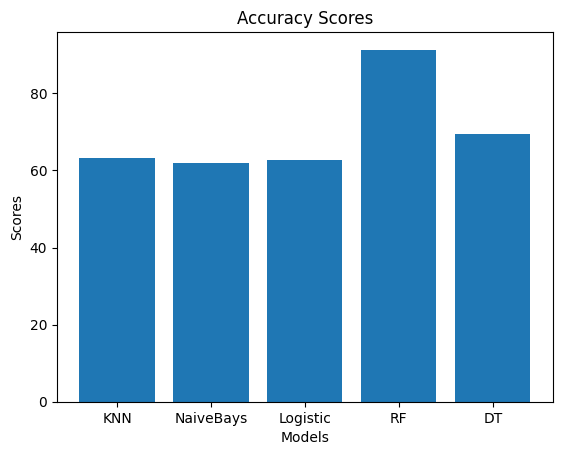

In [ ]:
plt.bar(models_names,accuracy_list)
plt.xlabel('Models')
plt.ylabel("Scores")
plt.title('Accuracy Scores')
plt.show()


[0.0012063980102539062, 0.0008208751678466797, 0.003310680389404297, 0.08094549179077148, 0.000492095947265625]


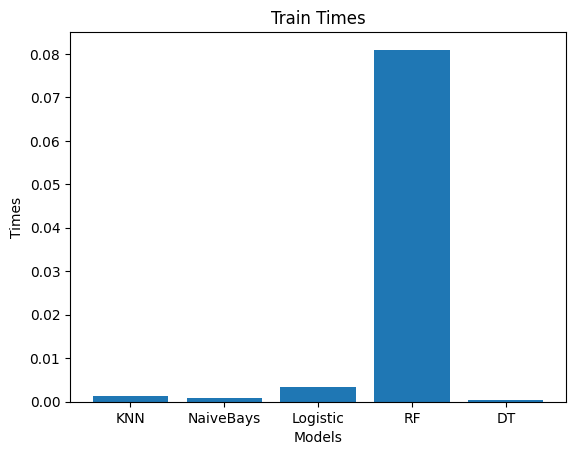

In [ ]:
print(train_time_list)
plt.bar(models_names,train_time_list)
plt.xlabel('Models')
plt.ylabel("Times")
plt.title('Train Times')
plt.show()


[0.18273377418518066, 0.011954784393310547, 0.007009267807006836, 0.29167699813842773, 0.00463557243347168]


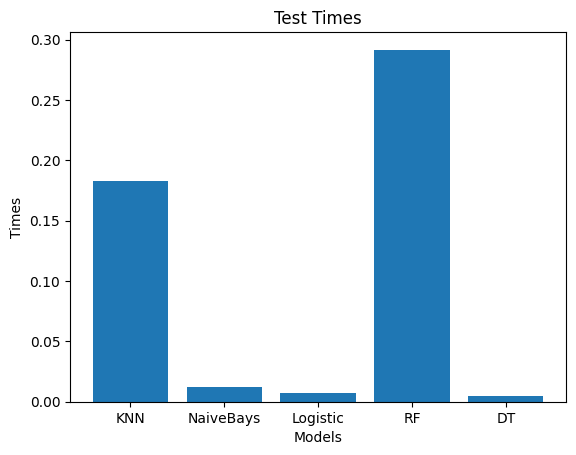

In [ ]:
print(test_time_list)
plt.bar(models_names,test_time_list)
plt.xlabel('Models')
plt.ylabel("Times")
plt.title('Test Times')
plt.show()
